# Lab5 Feature Class
----------------------------------

## Task 1

DataFrame and Data Series.

In [8]:
# Import geopandas module
import geopandas as gpd

In [11]:
# Read build-in dataset using gpd.read_file()
data = gpd.read_file("C:\Users\casca\Downloads\AccessBB")

In [12]:
# print the firs 5 rows of data
data.head(5)

shape_leng    shape_area      boro_name  boro_code  \
0  330434.340939  1.623914e+09  Staten Island        5.0   
1  361657.416718  6.366004e+08      Manhattan        1.0   
2  741150.814455  1.937596e+09       Brooklyn        3.0   
3  895729.259626  3.044780e+09         Queens        4.0   
4  463454.790585  1.186619e+09          Bronx        2.0   

                                            geometry  
0  (POLYGON ((-74.05050806403247 40.5664220341608...  
1  (POLYGON ((-74.01092841268032 40.6844914725429...  
2  (POLYGON ((-73.86706149472119 40.5820879767934...  
3  (POLYGON ((-73.83668274106707 40.5949466970158...  
4  (POLYGON ((-73.89680883223774 40.7958084451597...

In [14]:
# print the type of data using type()
type(data)

geopandas.geodataframe.GeoDataFrame

In [27]:
# get the geometry column by specifying the column name 
# within square brackets [], save it as a variable "geoColumn"
# print the firs 5 rows of geoColumn
geoColumn = data['geometry']
geoColumn.head()

0    (POLYGON ((-74.05050806403247 40.5664220341608...
1    (POLYGON ((-74.01092841268032 40.6844914725429...
2    (POLYGON ((-73.86706149472119 40.5820879767934...
3    (POLYGON ((-73.83668274106707 40.5949466970158...
4    (POLYGON ((-73.89680883223774 40.7958084451597...
Name: geometry, dtype: object

In [28]:
# print the type of geoColumn using type()
type(geoColumn)

geopandas.geoseries.GeoSeries

In [25]:
# Make a selection that contains only the first five rows
# of data, rename it as selection
selection = data[0:5]
# We can iterate over the selected rows using a specific .iterrows() 
# -function in (geo)pandas and print the x coordinate for each point
for index, row in selection.iterrows():
    print index
    print row['geometry'].area

0
0.0160464654405
1
0.00630886205976
2
0.0191642375386
3
0.0301432839186
4
0.0117728754753


0.011772875475342993

In [29]:
# Let’s next create a new column 'area' into our GeoDataFrame (data) to 
# store the area of each polygon
data['area'] = data.area
# print the first five row of data
data.head()

shape_leng    shape_area      boro_name  boro_code  \
0  330434.340939  1.623914e+09  Staten Island        5.0   
1  361657.416718  6.366004e+08      Manhattan        1.0   
2  741150.814455  1.937596e+09       Brooklyn        3.0   
3  895729.259626  3.044780e+09         Queens        4.0   
4  463454.790585  1.186619e+09          Bronx        2.0   

                                            geometry      area  
0  (POLYGON ((-74.05050806403247 40.5664220341608...  0.016046  
1  (POLYGON ((-74.01092841268032 40.6844914725429...  0.006309  
2  (POLYGON ((-73.86706149472119 40.5820879767934...  0.019164  
3  (POLYGON ((-73.83668274106707 40.5949466970158...  0.030143  
4  (POLYGON ((-73.89680883223774 40.7958084451597...  0.011773

In [30]:
# use panda functions to get the maximum and mean area of these polygon.
# hint: .max(), .mean()
print data['area'].max()
print data['area'].mean()

0.0301432839186
0.0166871448866


## Task 2

Read and write shapefile.

Download data from this [link](https://github.com/Automating-GIS-processes/Lesson-2-Geo-DataFrames/raw/master/data/Data.zip). 
Unzip the file into your lab folder.  
The Data folder includes a Shapefile called DAMSELFISH_distribution.shp (and files related to it)

In [31]:
# Import necessary modules
import geopandas as gpd
# Set filepath (fix path relative to yours)
fp = r"C:\Users\casca\Downloads\SimpleAccess\DataDamselFish\Data\DAMSELFISH_distributions.shp"
# Read file using gpd.read_file()
data = gpd.read_file(fp)

In [33]:
# Let’s take a look at the data and print the first 5 rows
# hint: head()
data.head()

ID_NO             BINOMIAL  ORIGIN COMPILER  YEAR  \
0  183963.0   Stegastes leucorus       1     IUCN  2010   
1  183963.0   Stegastes leucorus       1     IUCN  2010   
2  183963.0   Stegastes leucorus       1     IUCN  2010   
3  183793.0  Chromis intercrusma       1     IUCN  2010   
4  183793.0  Chromis intercrusma       1     IUCN  2010   

                                            CITATION SOURCE DIST_COMM ISLAND  \
0  International Union for Conservation of Nature...                           
1  International Union for Conservation of Nature...                           
2  International Union for Conservation of Nature...                           
3  International Union for Conservation of Nature...                           
4  International Union for Conservation of Nature...                           

  SUBSPECIES                        ...                         RL_UPDATE  \
0                                   ...                            2012.1   
1                                   ...                            2012.1   
2                                   ...                            2012.1   
3                                   ...                            2012.1   
4                                   ...                            2012.1   

  KINGDOM_NA  PHYLUM_NAM      CLASS_NAME   ORDER_NAME     FAMILY_NAM  \
0   ANIMALIA    CHORDATA  ACTINOPTERYGII  PERCIFORMES  POMACENTRIDAE   
1   ANIMALIA    CHORDATA  ACTINOPTERYGII  PERCIFORMES  POMACENTRIDAE   
2   ANIMALIA    CHORDATA  ACTINOPTERYGII  PERCIFORMES  POMACENTRIDAE   
3   ANIMALIA    CHORDATA  ACTINOPTERYGII  PERCIFORMES  POMACENTRIDAE   
4   ANIMALIA    CHORDATA  ACTINOPTERYGII  PERCIFORMES  POMACENTRIDAE   

  GENUS_NAME   SPECIES_NA CATEGORY  \
0  Stegastes     leucorus       VU   
1  Stegastes     leucorus       VU   
2  Stegastes     leucorus       VU   
3    Chromis  intercrusma       LC   
4    Chromis  intercrusma       LC   

                                            geometry  
0  POLYGON ((-115.6437454219999 29.71392059300007...  
1  POLYGON ((-105.589950704 21.89339825500002, -1...  
2  POLYGON ((-111.159618439 19.01535626700007, -1...  
3  POLYGON ((-80.86500229899997 -0.77894492099994...  
4  POLYGON ((-67.33922225599997 -55.6761029239999...  

[5 rows x 24 columns]

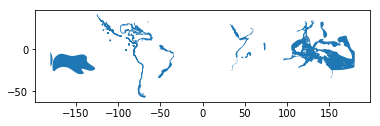

In [34]:
%matplotlib inline
# Let’s also take a look how our data looks like on a map. If you just
# want to explore your data on a map, you can use .plot() -function in geopandas 
# that creates a simple map out of the data
data.plot()

In [35]:
# Let’s select first 10 rows of the input data, save it as data10
data10 = data.head(10)

In [38]:
# write the selection into a Shapefile (Frist10.shp) with geodataframe.to_file() -function
data10.to_file(r'C:\Users\casca\Downloads\DataDamselFish\Data\first10.shp')

## Task 3

Create a shapefile with 3 point features from scratch

In [1]:
# Import necessary modules first
# e.g. geopandas, shapely geometries, fiona
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import fiona

# Create an empty geopandas GeoDataFrame using GeoDataFrame()
newdata = gpd.GeoDataFrame()

In [40]:
# Create a new column called 'geometry' to the GeoDataFrame
newdata['geometry']=None
print newdata

Empty GeoDataFrame
Columns: [geometry]
Index: []


In [41]:
# Create 3 Shapely points with random coordinates using Point()
point1 = Point(2,2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)

In [42]:
# Insert the points into 'geometry' -column at index 0-2
# using Geodataframe.loc[rowindex, columnindex] = your point
newdata.loc[0,'geometry'] = point1
newdata.loc[1,'geometry'] = point2
newdata.loc[2,'geometry'] = point3
newdata

geometry
0    POINT Z (2 2 4.2)
1    POINT (7.2 -25.1)
2  POINT (9.26 -2.456)

In [43]:
# Add a new column called name and insert data
newdata.loc[0:2, 'name'] = list("ABC")
newdata

geometry name
0    POINT Z (2 2 4.2)    A
1    POINT (7.2 -25.1)    B
2  POINT (9.26 -2.456)    C

In [ ]:
# Import specific function 'from_epsg' from fiona module
from fiona.crs import from_epsg
# Set the GeoDataFrame's coordinate system to WGS84
newdata.crs = from_epsg(4326)

In [44]:
# # write the newfile into a Shapefile with geodataframe.to_file() -function
out = r"C:\Users\casca\Downloads\AdvProGISt4\NewCreatedShpTask.shp"
newdata.to_file(out)

In [45]:
out

'C:\\Users\\casca\\Downloads\\AdvProGISt4\\NewCreatedShpTask.shp'

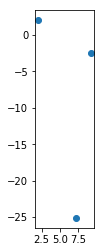

In [47]:
newdata.plot()